### Name: Arielle Molina

### Student ID: 10737308

### Group: H

Please fill in you name, student ID and group above, and also edit the filename according to the specified format.

# Classification using Gaussian distributions

For this assignment we will work with a classic dataset from machine learning; Fisher's Iris dataset. The dataset contains the measurements of *length* and *width* of the *sepals* and *petals* of 150 flowers. 

<img src="https://upload.wikimedia.org/wikipedia/commons/7/78/Petal-sepal.jpg", width=250>

Using these 4 attributes (*length* and *width* of both), the flowers should then be classified as as one of 3 species of Iris flower:

* Iris setosa
* Iris versicolor
* Iris virginica

This dataset is such a classic example that is even included in machine learning libraries. To get started we will install the [scikit-learn](http://scikit-learn.org/stable/index.html) library. For now, we will only use it to load in the dataset, but in later assignments we will use more of its capabilities. Install the library with

    sudo pip3 install scikit-learn
    
Now the code below should store the dataset as the variable `iris`

In [2]:
import math
import matplotlib.pylab as plt
import numpy as np

from sklearn import datasets

iris = datasets.load_iris()
print(iris)

{'data': array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
 

## Separate and plot the data [1 pt]

The `iris` variable now contains an object with all sorts of information about the dataset. The 2 most important atributes are *target* and *data* containing respectively the labels and the datapoints for the 150 flowers. An attribute of the object can be accessed with **.** as shown below.

Use this to create the matrix $X$ and the vector $R$. Then divide the matrix $X$ into 3 parts, $C_0$, $C_1$ and $C_2$, each containing the data for a different class, as labeled by the vector $R$.

Now that we have the data divided into 3 classes, we can plot it to see what it looks like. Make a plot with the first 2 attributes (sepal length and width) on the x and y axis, using different colored points for each of the 3 classes. Repeat this and make a seperate plot for the the other 2 attributes (petal length and width).

In [3]:
print(iris.target_names)

# Your code goes here
X=iris.data
R=iris.target
s=(1,5)
C0 = np.zeros(s)
C1 = np.zeros(s)
C2 = np.zeros(s)
#print(C0.shape)

for i in range(len(R)):
    a = np.array(X[i , :])
    if R[i]==0 :
        a = np.append(a, 0).reshape(1,5)
        C0 = np.append(C0, a, axis = 0)
    elif R[i] == 1 :
        a = np.append(a, 1).reshape(1,5)
        C1 = np.append(C1, a , axis = 0 )
    elif R[i] == 2 :
        a = np.append(a, 2).reshape(1,5)
        C2 = np.append(C2, a, axis = 0)

C0 = np.delete(C0, (0), axis = 0)
C1 = np.delete(C1, (0), axis = 0)
C2 = np.delete(C2, (0), axis = 0)

print("the shape of C0 is", C0.shape,  "\n the shape of C1 is ", C1.shape, "\n the shape of C2 is", C2.shape)
print(C0, "\nbla" , C1, "\nbla", C2)



['setosa' 'versicolor' 'virginica']
the shape of C0 is (50, 5) 
 the shape of C1 is  (50, 5) 
 the shape of C2 is (50, 5)
[[ 5.1  3.5  1.4  0.2  0. ]
 [ 4.9  3.   1.4  0.2  0. ]
 [ 4.7  3.2  1.3  0.2  0. ]
 [ 4.6  3.1  1.5  0.2  0. ]
 [ 5.   3.6  1.4  0.2  0. ]
 [ 5.4  3.9  1.7  0.4  0. ]
 [ 4.6  3.4  1.4  0.3  0. ]
 [ 5.   3.4  1.5  0.2  0. ]
 [ 4.4  2.9  1.4  0.2  0. ]
 [ 4.9  3.1  1.5  0.1  0. ]
 [ 5.4  3.7  1.5  0.2  0. ]
 [ 4.8  3.4  1.6  0.2  0. ]
 [ 4.8  3.   1.4  0.1  0. ]
 [ 4.3  3.   1.1  0.1  0. ]
 [ 5.8  4.   1.2  0.2  0. ]
 [ 5.7  4.4  1.5  0.4  0. ]
 [ 5.4  3.9  1.3  0.4  0. ]
 [ 5.1  3.5  1.4  0.3  0. ]
 [ 5.7  3.8  1.7  0.3  0. ]
 [ 5.1  3.8  1.5  0.3  0. ]
 [ 5.4  3.4  1.7  0.2  0. ]
 [ 5.1  3.7  1.5  0.4  0. ]
 [ 4.6  3.6  1.   0.2  0. ]
 [ 5.1  3.3  1.7  0.5  0. ]
 [ 4.8  3.4  1.9  0.2  0. ]
 [ 5.   3.   1.6  0.2  0. ]
 [ 5.   3.4  1.6  0.4  0. ]
 [ 5.2  3.5  1.5  0.2  0. ]
 [ 5.2  3.4  1.4  0.2  0. ]
 [ 4.7  3.2  1.6  0.2  0. ]
 [ 4.8  3.1  1.6  0.2  0. ]
 [ 5.4  3.

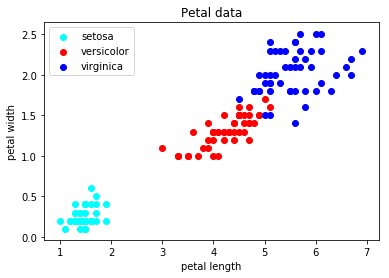

In [4]:
def sepal_length(C):
    return C[:, 0]
def sepal_width(C):
    return C[:, 1]
def petal_length(C):
    return C[:, 2]
def petal_width(C):
    return C[:, 3]

#Draw plot of the petal measures
#plt.scatter(C0[:, 2], C0[:, 3], color = 'cyan', label = 'setosa')
#plt.scatter(C1[:, 2], C1[:, 3], color = 'red', label = 'versicolor')
#plt.scatter(C2[:, 2], C2[:, 3], color = 'blue', label = 'virginica')
plt.scatter(C0[:, 2], petal_width(C0), color = 'cyan', label = 'setosa')
plt.scatter(C1[:, 2], petal_width(C1), color = 'red', label = 'versicolor')
plt.scatter(C2[:, 2], petal_width(C2), color = 'blue', label = 'virginica')
plt.ylabel("petal width")
plt.xlabel("petal length")
plt.title("Petal data")
plt.legend()
plt.show()

#print(C1[:, 2])
#print(C1)
#print(np.amax(petal_length(X)))

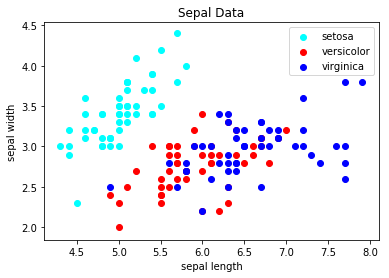

In [5]:
#Draw plot of the petal measures
plt.scatter(C0[:, 0], C0[:, 1], color = 'cyan', label = 'setosa')
plt.scatter(C1[:, 0], C1[:, 1], color = 'red', label = 'versicolor')
plt.scatter(C2[:, 0], C2[:, 1], color = 'blue', label = 'virginica')
plt.ylabel("sepal width")
plt.xlabel("sepal length")
plt.title("Sepal Data")
plt.legend()
plt.show()

## Validation sets [0 pts]

Now that we have an idea what our dataset looks like, our goal is to create a model that will predict the class (in this case iris species) based on the other variables. In order to evaluate how well the model fits, we will also need a validation set where we can test some of our predictions. For this we will again split the data into a training and a validation set. Fill in the function below, you can use your function from last week as inspiration. Don't forget to randomize your data before splitting.

Now use this function on the data of each of the 3 classes, using a ratio of $0.7$ for each. This should result in 3 different training sets and 3 different validation sets. Be sure to name them all differently, so you can still use them all later in the assignment.

In [6]:
def validation_split(data, ratio):
    #data = iris.data[: , 2:4]
    N,M = data.shape
    split = int(N*ratio)
    datacopy = np.copy(data)
    np.random.shuffle(datacopy)
    training = datacopy[:split,:]
    validation = datacopy[split:,:]
    return training, validation

# DEFINE TRAINING AND VALIDATION SETS
C0_training, C0_test = validation_split(data = C0[: , :], ratio = 0.7) #training and test sets of  C0
C1_training, C1_test = validation_split(data = C1[: , :], ratio = 0.7) #training and test sets of C1
C2_training, C2_test = validation_split(data = C2[: , :], ratio = 0.7) #training and test sets of C2

In [32]:
print(C0_test)

[[ 5.1  3.8  1.5  0.3  0. ]
 [ 5.4  3.9  1.3  0.4  0. ]
 [ 4.7  3.2  1.6  0.2  0. ]
 [ 5.3  3.7  1.5  0.2  0. ]
 [ 4.4  2.9  1.4  0.2  0. ]
 [ 4.6  3.6  1.   0.2  0. ]
 [ 5.   3.5  1.6  0.6  0. ]
 [ 5.2  4.1  1.5  0.1  0. ]
 [ 4.6  3.4  1.4  0.3  0. ]
 [ 5.   3.3  1.4  0.2  0. ]
 [ 4.6  3.2  1.4  0.2  0. ]
 [ 4.6  3.1  1.5  0.2  0. ]
 [ 4.9  3.1  1.5  0.1  0. ]
 [ 5.   3.2  1.2  0.2  0. ]
 [ 5.7  3.8  1.7  0.3  0. ]]


## Univariate model [1 pt]

Looking at the plots of the data from the previous section, you might assume that separating the different classes would be a lot easier based on the petal data (3rd and 4th variable) than on the sepal data (1st and 2nd variable), as it easier to distinguish the different clusters in that plot. In fact, for now we will only focus on 1 variable, the petal length (3rd variable), as it looks like it might be useful just on its own and will simplify the model.

Using the training data from each of 3 classes, compute the mean and standard deviation for the *pedal length* attribute. The Maximum Likelihood Estimators for these are given by

(4.8a) $$m = \frac{\sum_{t=1}^Nx^t}{N}$$

(4.8b) $$s = \sqrt{\frac{\sum_{t=1}^N(x^t - m)^2}{N}}$$

You can also use the built-in *Numpy* functions for [mean](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html) and [standard deviation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html). Print the results for each class and make sure they make sense in comparison to the plot.

In [7]:
# create function that returns the maximun likelihood estimators for the variable and dataset of choice
def mle(data):
    return np.mean(data), np.std(data)

a = mle(petal_length(C0_training))
b = mle(petal_length(C1_training))
c = mle(petal_length(C2_training))

print("the mean and standard deviation of the petal length of class 0 is:",  a, "\n")
print("the mean and standard deviation of the petal length of class 1 is:",  b, "\n")
print("the mean and standard deviation of the petal length of class 2 is:",  c, "\n")
    

the mean and standard deviation of the petal length of class 0 is: (1.4771428571428571, 0.17252033302229172) 

the mean and standard deviation of the petal length of class 1 is: (4.2885714285714283, 0.47072675032271932) 

the mean and standard deviation of the petal length of class 2 is: (5.5628571428571423, 0.54462868834029055) 



In [8]:
d = mle(petal_width(C0_training))
e = mle(petal_width(C1_training))
f = mle(petal_width(C2_training))

print("the mean and standard deviation of the petal width of class 0 is:",  d, "\n")
print("the mean and standard deviation of the petal width of class 1 is:",  e, "\n")
print("the mean and standard deviation of the petal width of class 2 is:",  f, "\n")

the mean and standard deviation of the petal width of class 0 is: (0.2428571428571428, 0.09938586931957763) 

the mean and standard deviation of the petal width of class 1 is: (1.3314285714285712, 0.19533331011585381) 

the mean and standard deviation of the petal width of class 2 is: (2.0228571428571427, 0.28191763162386307) 



## Probability density function [1 pt]

The probability density function for a Gaussian distribution is defined as

(4.7) $$\frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

That means that if we have estimates for $\mu$ and $\sigma$, we can compute the probability density for a specific value $x$. Implement this in the function below.

We already made estimates for $\mu$ and $\sigma$ for the *pedal length* for each of the 3 classes, so we can now define PDFs for each class. Plot the 3 functions using [linspace](https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linspace.html) for a range of x-values (like in last weeks assignment) and apply the PDF functions to obtain the y-values. Estimate a sensible range for *linspace* based on the previous plots.

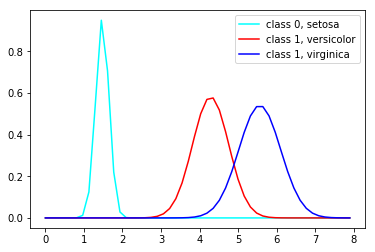

In [9]:
#probability density functions 
def PDF(x, m, s):
    Range = np.linspace(0, np.amax(petal_length(X))+1, x)
    kkk=[]
    for i in range(len(Range)):
        pdf = 1/math.sqrt(2*math.pi*s)*math.exp(-(Range[i]-m)**(2)/2/s**2) 
        kkk = np.append(kkk, pdf)
    return Range, kkk

a,b = mle(petal_length(C0_training))
x,y = PDF(50, a, b)
#print(y)
plt.plot(x, y, label = 'class 0, setosa', color = 'cyan')
c,d = mle(petal_length(C1_training))
x1, y1 = PDF(50, c, d)

plt.plot(x1, y1, label = 'class 1, versicolor', color = 'red')
e, f = mle(petal_length(C2_training))
x2, y2 = PDF(50, e, f)

plt.plot(x2, y2, label = 'class 1, virginica', color = 'blue')
plt.legend()
plt.show()




## Posterior probabilities [1 pt]

The plot above shows the probability densities for a value $x$, provided that you know the parameters for a specific class, i.e. $p(x | \mu_i, \sigma_i)$. Given that the mean and standard deviation are suffient statistics of normally distributed data, this is equivalent to the probability density given a specific class $p(x | C_i)$. However, what would be useful for classification is the posterior probabilities the classes given the data, i.e. $p(C_i | x)$. We can use Bayes' rule for this

(3.5) $$P(C_i | x) =  \frac{p(x | C_i) P(C_i)}{p(x)} = \frac{p(x | C_i) P(C_i)}{\sum_{k=1}^K p(x | C_k) P(C_k)}$$

Given we have no prior knowledge of the distribution of the different classes, we can just assume all prior class probabilities $P(C_i)$ to be equal. For our 3 class problem, that would mean a probability of $\frac{1}{3}$ for each class, but we can also just factor the common prior out of the equation and simplify to

$$P(C_i | x) = \frac{p(x | C_i)}{\sum_{k=1}^K p(x | C_k)}$$

In order to make the code a little easier to write, make a vector $m$ with all values of $m_i$ and vector $s$ with all values of $s_i$. You can then just pass those 2 vectors and a parameter $i$ indicating which class you want to compute the posterior for. Write the function for the posterior below and plot the posterior probabilities for all 3 classes.

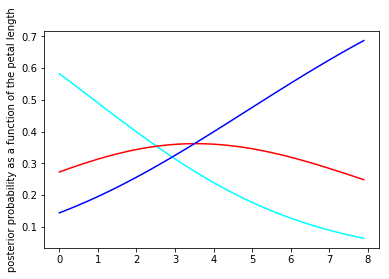

In [10]:
#create two arrays containing the mean and standard deviations of the petal lengths  of each class
marray= [mle(C0_training)[0], mle(C1_training)[0], mle(C2_training)[0]] 
sarray = [mle(C0_training)[1], mle(C1_training)[1], mle(C2_training)[1]] 

#print("mean of class 2 is ", sarray[2])

def posterior(mean, standard, i, x):
    s=(x,1)
    posteriorr =np.zeros(s, dtype=np.float)
    k, a = PDF(x, mean[0], standard[0])
    kk, b = PDF(x, mean[1], standard[1])
    kkk, c = PDF(x, mean[2], standard[2])    
    denominator = np.zeros(s)
    #print(a.shape)
    for j in range(x):
        denominator[j, 0] = a[j] + b[j] + c[j]
    if i == 1:
        a = b.reshape(s)
    elif i == 2: 
        a = c.reshape(s)
    else:
        a = a.reshape(s)
    posteriorr =a/denominator #posterior is p(x|Ci)/sum of all probabilities
    return k, posteriorr

x0, pos = posterior(marray , sarray , i = 0, x= 100)
#print("shape of the posterior is ", pos.shape, "\nand the posterior points are ", pos)
plt.plot(x0, pos, color = 'cyan', label = 'class 0')
x1, pos1 = posterior(marray , sarray , i = 1, x= 50)
plt.plot(x1, pos1, color = 'red', label = 'class 1')
x2, pos2 = posterior(marray , sarray , i = 2, x= 50)
plt.plot(x2, pos2, color = 'blue', label = 'class 2')
plt.ylabel('posterior probability as a function of the petal length')
#plt.xlabel()
plt.show()

## Bayes Classifier [2 pts]

Now that we can compute the posteriors for every class, constructing a classifier is easy. The Bayes classifier is defined as

(3.6) $$choose\ C_i\ if\ P (C_i |x) = max_k\ P(C_k |x)$$

Write the code below to classify a single datapoint as one of the 3 classes, returning $0$, $1$ or $2$ based on the which class the flower is most likely to belong to. Remember that the means and standand deviations we have computed are only based on the *petal length* variable, while a datapoint consists of a complete row, i.e. all 4 variables describing the dimensions of a flower instance. In the current classifier you will only need the *petal length* of each to compute the posterior for a class.

Now complete the `validate` function below. It should take a validation set, the expected class for that set and the vectors $m$ and $s$ on which to base the classifications and return the percentage of elements that was classified correctly. Apply the function to all 3 validation sets and report the percentage correct for each class. Also include the average correct percentage for all 3 classes.

In [45]:
def classify(x, m, s):
    pdf = ([0., 0., 0.])
    posterior = ([0., 0., 0.])
    for i in range (3):
        pdf[i] = 1/math.sqrt(2*math.pi*s[i])*math.exp(-(x-m[i])**(2)/2/s[i]**2) 
    #print(pdf)
    for i in range(3):
        posterior[i] = pdf[i]/(pdf[0] + pdf[1] + pdf[2])
    maxk = np.amax(posterior) #define which of the three distributions is highest for a certain petal length x
    #print(maxk)
    #Classs = 10
    if maxk == posterior[0] :
        Classs = 0
    elif maxk == posterior[1] :
        Classs = 1
    elif maxk == posterior[2]:
        Classs = 2
    return Classs

#test for  a value of  x=0.5
hi = classify(0.5 , marray, sarray)   

# test for a random data point of the iris data set
a = np.random.choice(petal_length(X))
hi= classify(a , marray, sarray )
print(a, hi)

def validate(val, expected, m, s):
    vector = np.array([classify(val[i], m, s) for i in range(len(val))]).T
    final_vector = vector - expected
    return (1 - np.count_nonzero(final_vector) / len(final_vector) ) * 100

print("percentage of right classifications for validation set 0 : ", validate(petal_length(C0_test), 0, marray, sarray))
print("percentage of right classifications for validation set 1 : ", validate(petal_length(C1_test), 1, marray, sarray))
print("percentage of right classifications for validation set 2 : ", validate(petal_length(C2_test), 2, marray, sarray))


1.5 0
percentage of right classifications for validation set 0 :  100.0
percentage of right classifications for validation set 1 :  13.33333333333333
percentage of right classifications for validation set 2 :  100.0


# Multivariate distributions

You should already get pretty good results using just the *petal length* variable (depending on the splits that were made for the validation sets, the exact percentage might vary a little), but maybe we can do better still. Looking at the original plots of the data, you might conclude that there could be more information for the classification in the other variables, so a multi-variate approach would make sense. This means we will need a multi-variate version of the probability density function for normal distributions, which is defined as

(5.9) $$p(x) = \frac{1}{(2\pi)^{\frac{d}{2}}|\boldsymbol{\Sigma}|^{\frac{1}{2}}} e^{-\frac{1}{2}(\boldsymbol{x} - \boldsymbol{\mu})^T\boldsymbol{\Sigma}^{-1}(\boldsymbol{x} - \boldsymbol{\mu})}$$

Here $\boldsymbol{x}$ is a $d$-dimensional vector drawn from the normal distribution $\mathcal{N}_d(\boldsymbol{\mu}, \boldsymbol{\Sigma})$, where $\boldsymbol{\mu}$ is the mean vector and $\boldsymbol{\Sigma}$ the covariance matrix.

If we used all 4 variables in the dataset to compute the vector of means and the covariance matrix for each class, then we could use the above equation to compute the probability densities for each class, then the posteriors for each class and finally use the same Bayes classifier to select the most probable class for a datapoint. However if the number of variables is large, then the number parameters for the covariance matrix (sized $d \times d$) can become too large to properly fit to the amount of data we have. It is therefore common to make some simplifying assumptions, to decrease the complexity of the model. One well know variant is *Naive Bayes*, where the assumption is that all variables are independent. This means the model only uses the variance for each variable and no covariances are included, which corresponds to a covariance matrix with only entries on the diagonal.

## Naive bivariate distributions [2 pts]

We will start with a bi-variate (i.e. 2 variables) distribution, as this will be easier to plot, visualize and thus reason about. Looking at the original 2 plots of the data, the second plot using the *petal length* and *petal width* seems to result in nice clusters, so we will use those 2 variables.  We will also use the *Naive Bayes* model for this data. Even if computing the covariance might not be problematic in this case, it will still be useful to see the effect of such a simplifying assumping.

This assumption of independence might be *naive* using real world data, you might even expect *length* and *width* of flower petals to be correlated, but it turns out *Naive Bayes* can still make an effective classifier. This assumption also simplifies the equation a lot: Instead of writing out the full version using the covariance matrices, we can write a multi-variate distribution as a product of one-dimensional distributions for each variable. So for our 2 variable case:

$$P(\boldsymbol{x}| C_i) = P(x_1 | C_i) P(x_2 | C_i)$$

Where $P(x_1 | C_i)$ is the old univariate distribution using the $\mu_1$ and $\sigma_1$ parameters of the first variable for class $C_i$ and $P(x_2 | C_i)$ is the same equation using the $\mu_2$ and $\sigma_2$ parameters of the second variable for class $C_i$.

Start by writing this *naive* version of the probability density function for the bivariate case. You will also have to compute the 3 means (for each of the 3 classes) and 3 standard deviations for the additional *petal width* variable. You should already have the code to compute these for the *petal length* variable from the univariate distributions. 

Now we will plot the density for each class to see what they look like. These plots will be a 3-dimensional; 2 dimensions for the values of the 2 variables and 1 dimension for the probability density belonging to that combination of variables. There are several ways to make 3d plots in *matplotlib*; we will use contour plots, as that is also what is used most in the book (see figure 5.3, 5.4, 5.5 and 5.6). Start with a simple plot of the points of the 2 variables using a different color for each class (like at the start of the assignment) and overlay the 3 contours on top of them.

Construct a mesh of X and Y values using [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) for each dimension and combining them with [meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html). Then compute the Z values for a probability density function of 1 class and use the [contour](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.contour) function to plot those Z values. Repeat this for the other 2 classes and show the final plot. You can also look at some demo uses of contour [here](http://matplotlib.org/examples/pylab_examples/contour_demo.html).

In [12]:
#In this cell I create the arrays containing maximum likelihood estimators for each variable , that is in total six arrays.
marray_SL = np.array([0., 0., 0.])
sarray_SL = np.array([0., 0., 0.])

marray_SW = np.array([0., 0., 0.])
sarray_SW = np.array([0., 0., 0.])

marray_PL = np.array([0., 0., 0.])
sarray_PL = np.array([0., 0., 0.])

marray_PW = np.array([0., 0., 0.])
sarray_PW = np.array([0., 0., 0.])


marray_SL[0], sarray_SL[0] = mle(sepal_length(C0_training))
marray_SL[1], sarray_SL[1] = mle(sepal_length(C1_training))
marray_SL[2], sarray_SL[2] = mle(sepal_length(C2_training))
print(sarray_SL, marray_SL)

marray_SW[0], sarray_SW[0] = mle(sepal_width(C0_training))
marray_SW[1], sarray_SW[1] = mle(sepal_width(C1_training))
marray_SW[2], sarray_SW[2] = mle(sepal_width(C2_training))
print(sarray_SW, marray_SW)

marray_PL[0], sarray_PL[0] = mle(petal_length(C0_training))
marray_PL[1], sarray_PL[1] = mle(petal_length(C1_training))
marray_PL[2], sarray_PL[2] = mle(petal_length(C2_training))

print(sarray_PL, marray_PL)

marray_PW[0], sarray_PW[0] = mle(petal_width(C0_training))
marray_PW[1], sarray_PW[1] = mle(petal_width(C1_training))
marray_PW[2], sarray_PW[2] = mle(petal_width(C2_training))
print(sarray_PW, marray_PW)


[ 0.34470928  0.48340628  0.65018679] [ 5.03428571  5.99428571  6.58      ]
[ 0.39168917  0.27959154  0.35046325] [ 3.40285714  2.78        2.96571429]
[ 0.17252033  0.47072675  0.54462869] [ 1.47714286  4.28857143  5.56285714]
[ 0.09938587  0.19533331  0.28191763] [ 0.24285714  1.33142857  2.02285714]


blablabla
[[  5.95016438e-35   1.17123363e-33   2.11203037e-32 ...,   2.86601103e-15
    9.17633222e-16   2.69155003e-16]
 [  3.54923274e-34   6.98632924e-33   1.25981181e-31 ...,   1.70955616e-14
    5.47362001e-15   1.60549136e-15]
 [  1.98545740e-33   3.90818526e-32   7.04744620e-31 ...,   9.56333716e-14
    3.06196864e-14   8.98119379e-15]
 ..., 
 [  1.23121300e-28   2.42352643e-27   4.37023093e-26 ...,   5.93037402e-09
    1.89877435e-09   5.56937787e-10]
 [  3.59423012e-29   7.07490233e-28   1.27578378e-26 ...,   1.73123002e-09
    5.54301488e-10   1.62584587e-10]
 [  9.84009172e-30   1.93692906e-28   3.49277284e-27 ...,   4.73966929e-10
    1.51753708e-10   4.45115421e-11]]


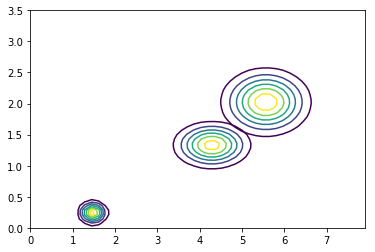

In [65]:
def PDF_naive(x1, x2, m1, m2, s1, s2):
    P1 =  1/math.sqrt(2*math.pi*s1)*np.exp(-(xx1-m1)**(2)/2/s1**2)
    P2 = 1/math.sqrt(2*math.pi*s2)*np.exp(-(xx2-m2)**(2)/2/s2**2)
    
    PDF = np.array(P1 * P2)
    return PDF


x1 = np.linspace(0, np.amax(petal_length(X)) + 1, 50)
x2 = np.linspace(0, np.amax(petal_width(X)) + 1, 50)

## note: you can't plot is, since the multivariate PDF depends on an input ARRAY, that is, the x-values are different for one particular pdf : say, the length 
## of the petal may be 2.3 whilst the width of the petal may be 1.3, and so you cannot plot both of these values onto one single point in a 2d plot
## only in 3d. And so we go with the contour plot

xx1, xx2 = np.meshgrid(x1, x2)
PDF0 = PDF_naive(xx1, xx2, marray_PL[0], marray_PW[0], sarray_PL[0], sarray_PW[0])
PDF1 = PDF_naive(xx1, xx2, marray_PL[1], marray_PW[1], sarray_PL[1], sarray_PW[1])
PDF2 = PDF_naive(xx1, xx2, marray_PL[2], marray_PW[2], sarray_PL[2], sarray_PW[2])


plt.contour(xx1, xx2, PDF0, label = 'setosa', color = 'cyan')
plt.contour(xx1, xx2, PDF1, label = 'versicolor', color = 'red')
plt.contour(xx1, xx2, PDF2, label = 'virginica', color = 'blue')
plt.show()

## Naive classifier [2 pt]

Now that you have the naive bivariate version of the `PDF` fuctions, constructing the *Naive Bayes* classifier will be straightforward. Simply adapt the `posterior`, `classify` and `validate` functions to work with your `PDF_naive` function.

Show the validation results for each of the 3 classes and the average over all 3 classes.

In [61]:
def posterior_naive(m1, m2, s1, s2, i, x1, x2):
    pdf_0 = PDF_naive(x1, x2, m1[0], m2[0], s1[0], s2[0])
    pdf_1 = PDF_naive(x1, x2, m1[1], m2[1], s1[1], s2[1])
    pdf_2 = PDF_naive(x1, x2, m1[2], m2[2], s1[2], s2[2])
    if i == 0 :
        posterior = pdf_0
    elif i == 1 :
        posterior = pdf_1
    elif i == 2 :
        posterior = pdf_1
    posterior = posterior/(pdf_0 + pdf_1 + pdf_2)
    return posterior

def classify_naive(x1, x2, m1, m2, s1, s2):
    pos_0 = posterior_naive(m1, m2, s1, s2, 0, x1, x2)
    pos_1 = posterior_naive(m1, m2, s1, s2, 1, x1, x2)
    pos_2 = posterior_naive(m1, m2, s1, s2, 2, x1, x2)
    
    posteriors = np.array([pos_0, pos_1, pos_2])
    print(pos_0.shape)
    maxk = np.amax(posteriors) #define which of the three distributions is highest for a certain petal length x
    print(maxk)
    Classs = 10
    if maxk == posteriors[0] :
        Classs = 0
    elif maxk == posteriors[1] :
        Classs = 1
    elif maxk == posteriors[2] :
        Classs = 2
    return Classs

check = classify_naive(1.0 , 2.0, marray_PL, marray_PW, sarray_PL, sarray_PW)

#def validate_naive(val, expected, m1, m2, s1, s2):
 #   return printf("The classifier function return Class ", classify_naive)


TypeError: posterior_naive() missing 1 required positional argument: 'x2'

## Decision boundaries [1 pt]

In *Alpaydin* the posterior equations are simplified as much as possible into a discriminant function, while still retaining the property

$$g_i(x) > g_j(x) \iff P(C_i|x) > P(C_j|x)$$

This can simplify the computation, or help gain insight in the actual distinguishing elements of the particular model. With some algebra, they can also be written into equations for the decision boundaries (the line where $g_i(x) = g_j(x)$). As we have a computer at our disposal, we won't worry too much about how many computations are needed and just let the machine do the work. If you make a contour plot of the complete posterior, these contours should also meet at the decision boundary, while being a lot less work to program.

For the previous cell you already wrote the `posterior_naive` function, so all that is left is to make contour plots just like for the `PDF_naive` function. Show the points for the 3 classes again and overlay the 3 posterior contours on top. Do the decision regions look like you would expect?

In [ ]:
# Your code goes here

## Full bivariate distribution [2 pts]

Finally, we will compare this naive distribution with a full bivariate distribution, using the complete covariance matrix. For this we will use some built-in functions, in order to avoid programming out the complete equations. Most importantly, we will use the [Multivariate Normal Distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html) from the *SciPy* stats module. With this we can create a distribution based on a mean vector and a covariance matrix. This we can then use to compute the probability density for a vector of x values, like so:

    distribution = multivariate_normal(mean=mean_vector, cov=covariance_matrix)
    prob_density = distribution.pdf(x_vector)

The mean vector and covariance matrix for a class can be computed using the numpy functions [mean](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html) and [covariance](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html).

Create 3 distribution, one for each class, using the functions linked above. Write the `PDF_full` function, which takes a `distr` argument that should correspond to a distribution for one class. Use that distribution to compute the probability density of the pair `x1`, `x2`.

Again plot the points for the 3 classes, using different colors for each class and overlay the contours of the probability densities for each of the 3 classes using a meshgrid. This should be the same as your contour plot for the naive bivariate distribution, only now using the full bivariate distribution to compute the densities.

In [ ]:
from scipy.stats import multivariate_normal

def PDF_full(x1, x2, distr):
    


## Full bivariate classifier [1 pts]

Adapt your `posterior`, `classify` and `validate` functions to work your `PDF_full` function. Each function should take a `distrs` argument, which should be a list containing the 3 `multivariate_normal` distributions for the 3 classes.

Show the validation results for each of the 3 classes and the average over all 3 classes.

In [ ]:
def posterior_full(distrs, i, x1, x2):
    

def classify_full(x1, x2, distrs):
    

def validate_full(val, expected, distrs):
    
